# Default Of Credit Card Clients


## About this dataset
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.<br>
<b>Our task</b> is developing a model to tell if client will `default` the payment or `not`.

### Features
- X1: Amount of the given credit.<br>
- X2: Gender (male; female).<br>
- X3: Education (graduate school; university; high school; others).<br>
- X4: Marital status (married; single; others).<br>
- X5: Age (years).<br>
- X6 – X11: History of past payments.<br>

 - Tracked past monthly payment records (from April to September, 2005) are displayed as follows:<br>
    X6 = the repayment status in September, 2005<br>
    X7 = the repayment status in August, 2005.<br>
    :<br>
    X11 = the repayment status in April, 2005.<br> 
 
 - The measurement scale for the repayment status is:<br>
    -1 = pay duly<br>
    1 = payment delay for one month<br>
    2 = payment delay for two months<br>
    :<br>
    8 = payment delay for eight months<br>
    9 = payment delay for nine months and above.<br>

- X12-X17: Amount of bill statement to each customer<br>
> X12 = in September, 2005<br>
X13 = in August, 2005<br>
:<br>
X17 = in April, 2005.<br>

- X18-X23: Amount of previous payment:<br>
    that each customer paid back to the credit-card company from April 2005 through September 2005. Each of these amounts was paid to settle the preceding month's bill, either in full or partially. For example, each September 2005 amount was paid to settle the corresponding customer's August 2005 bill.

> X18 = amount paid in September, 2005<br>
X19 = amount paid in August,2005.<br>
:<br>
X23 = amount paid in April, 2005.<br>

- Y: Did the person default? (`Yes = 1`, `No = 0`)

### Dataset attributions
Website: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

Name: I-Cheng Yeh<br>
email addresses: (1) icyeh '@' chu.edu.tw (2) 140910 '@' mail.tku.edu.tw<br>
institutions: (1) Department of Information Management, Chung Hua University, Taiwan. (2) Department of Civil Engineering, Tamkang University, Taiwan.<br>
other contact information: 886-2-26215656 ext. 3181

## Load packages

In [1]:
import numpy as np
import pandas as pd
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from scipy.stats import loguniform

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

%matplotlib inline

from datetime import datetime 

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import LeaveOneOut
# random search 
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix

## Read the data

> The 1st row must be droped and make row 1 a header for our dataframe, as it has representative names

In [2]:
df = pd.read_excel("default of credit card clients.xls",skiprows=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Look for more details

In [3]:
df.shape

(30000, 25)

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### Information about the features
    Length of Dataframe, Data type, and Null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   29669 non-null  object
 4   MARRIAGE                    29677 non-null  object
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

There are 25 columns, 30000 Rows<br>
`Education & MARRIAGE` have missing values<br>
All features are `integer` type except `SEX`, `EDUCATION`, and `MARRIAGE` are object type

In [6]:
df.describe()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.518833,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,9.528019,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,267.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


There are outliers in `Age` as the max value equals 267 which seems Abnormal.<br>
`BILL_AMT1` to `BILL_AMT6` have also outliers as the min values are `Negative` although it should be zero or above.

### Check Duplication

In [7]:
df.duplicated().sum()

0

### Show Categories in EDUCATION, MARRIAGE, and SEX

In [8]:
df.EDUCATION.unique()

array(['university', 'graduate school', 'others', 'high school', nan, 0],
      dtype=object)

In [9]:
df.MARRIAGE.unique()

array(['married', 'single', nan, 0], dtype=object)

In [10]:
df.SEX.unique()

array(['female', 'male'], dtype=object)

## Data Exploring

In [11]:
sns.set(font_scale=1.3)

### Distribution of AGE

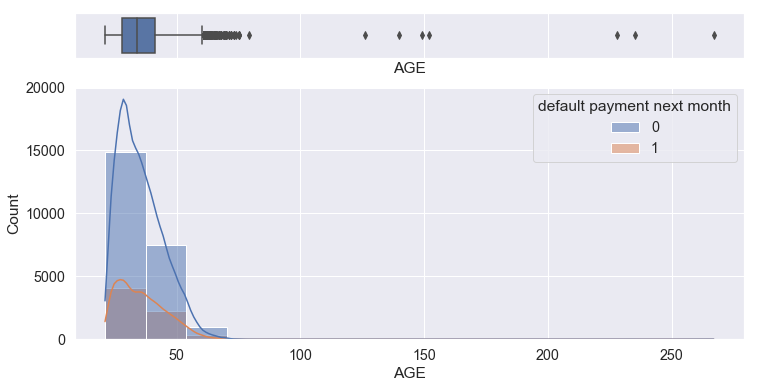

In [12]:
figure, (ax_box, ax_hist) = plt.subplots(2
                                        , sharex=True
                                        , gridspec_kw={"height_ratios": (.15, .85)}
                                        , figsize=(12,6)
                                       )

sns.boxplot(df["AGE"]
            , ax=ax_box
           )

sns.histplot(data=df
             , x="AGE"
             , label="Age"
             , kde=True
             , hue='default payment next month'
             , ax=ax_hist
             , bins=15
            )
plt.show()

As we said earlier the `age` is Right skewed and has alot of outliers

In [13]:
print(df['AGE'].value_counts(bins=15, sort=False))

(20.753, 37.4]    18955
(37.4, 53.8]       9739
(53.8, 70.2]       1284
(70.2, 86.6]         15
(86.6, 103.0]         0
(103.0, 119.4]        0
(119.4, 135.8]        1
(135.8, 152.2]        3
(152.2, 168.6]        0
(168.6, 185.0]        0
(185.0, 201.4]        0
(201.4, 217.8]        0
(217.8, 234.2]        1
(234.2, 250.6]        1
(250.6, 267.0]        1
Name: AGE, dtype: int64


After `70 years` old the number of rows is very `low`

In [14]:
df[df.AGE>=71].shape

(22, 25)

### Distribution of Bill Amount

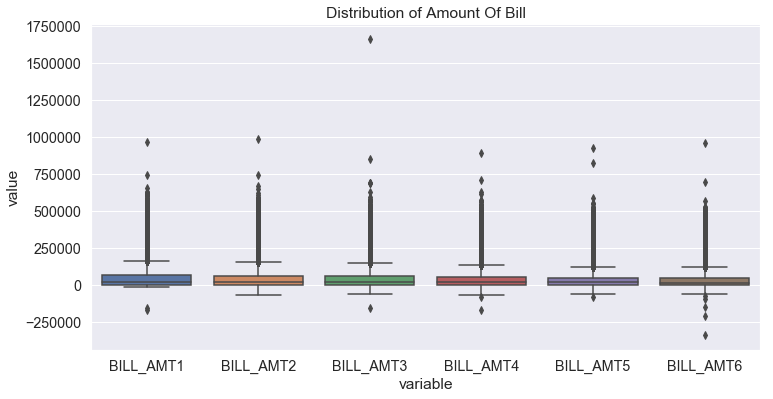

In [15]:
bill = df[['BILL_AMT{}'.format(i) for i in range(1,7)]]
plt.figure(figsize=(12,6))

sns.boxplot(x="variable"
            , y="value"
            , data=pd.melt(bill)
           )

plt.title("Distribution of Amount Of Bill")
plt.show()

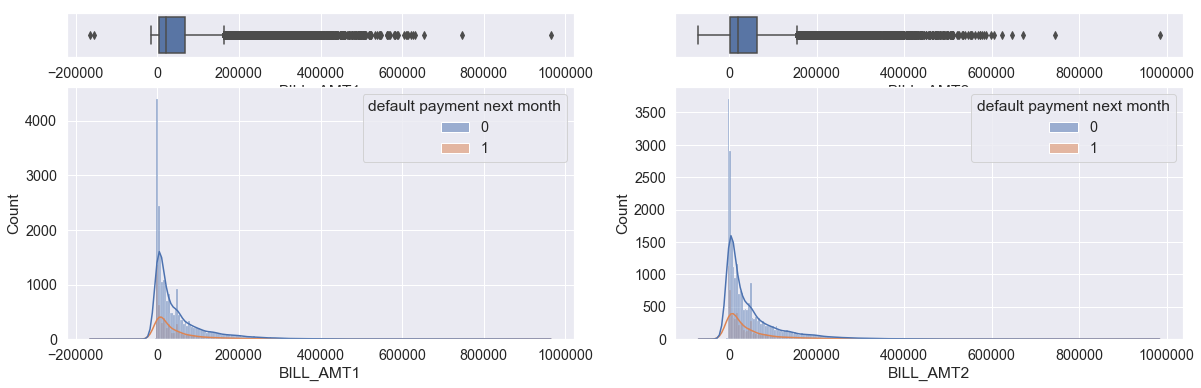

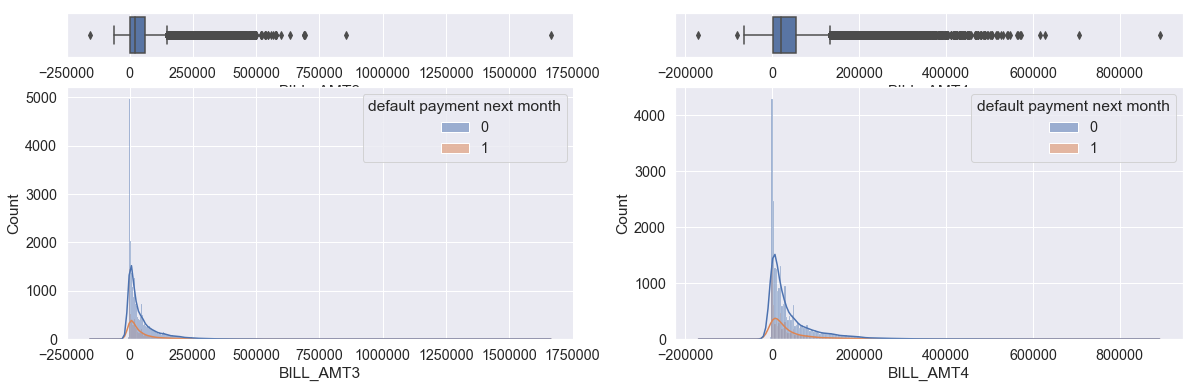

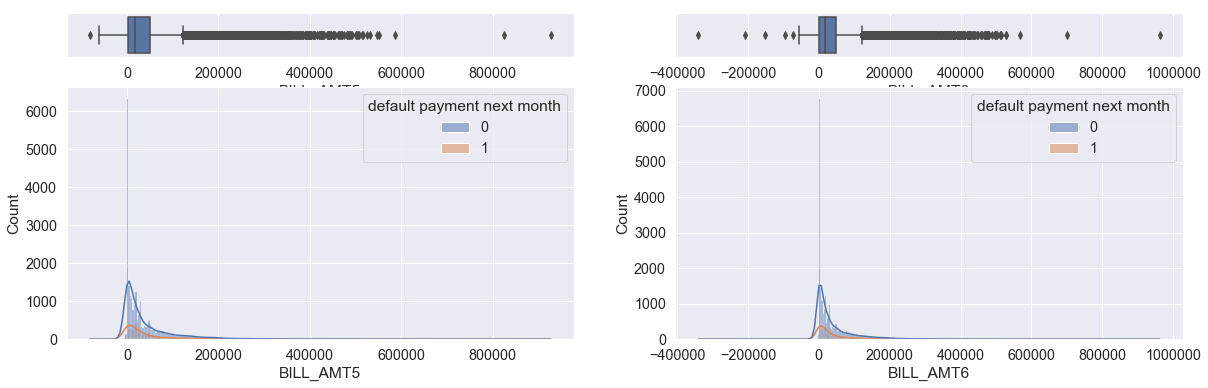

In [16]:
f, ax = plt.subplots(2,2
                    , figsize=(20,6)
                    , gridspec_kw={"height_ratios": (.15, .85)}
                   )

for i in range(1,7):
    sns.boxplot(df["BILL_AMT{}".format(i)]
                , ax=ax[0,(i-1)%2]
               )
    sns.histplot(data=df
                 , x="BILL_AMT{}".format(i)
                 , label="BILL_AMT{}".format(i)
                 , kde=True
                 , hue='default payment next month'
                 , ax=ax[1,(i-1)%2])
    if i%2==0:
        plt.show()
        if i<6:
            f, ax = plt.subplots(2,2
                        , figsize=(20,6)
                        , gridspec_kw={"height_ratios": (.15, .85)}
                       )
    

### Distribution of Payment Amount

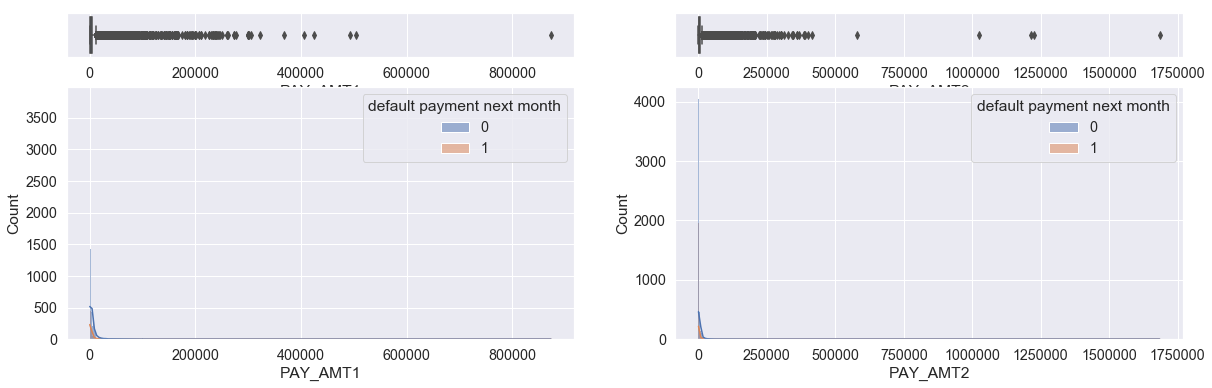

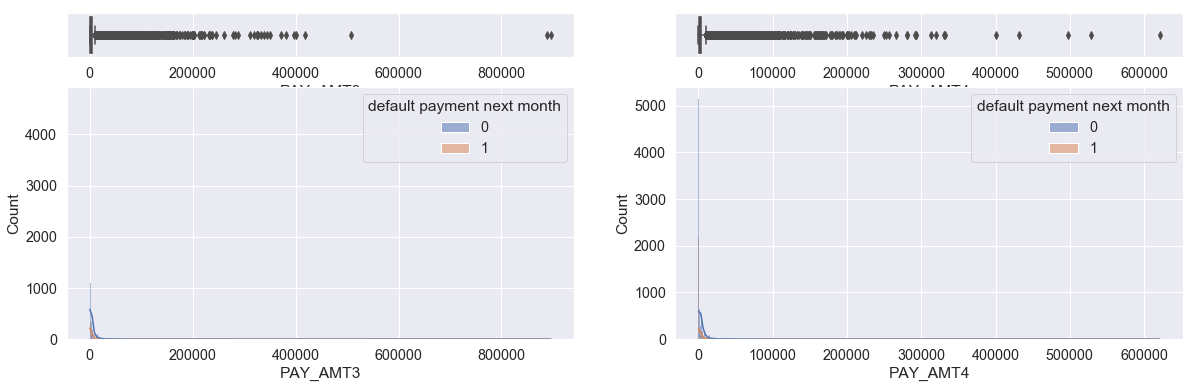

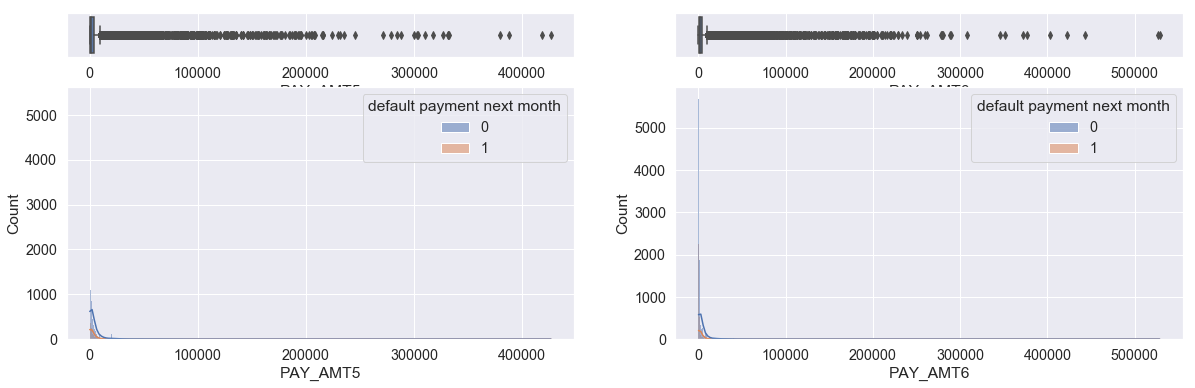

In [17]:
f, ax = plt.subplots(2,2
                    , figsize=(20,6)
                    , gridspec_kw={"height_ratios": (.15, .85)}
                   )

for i in range(1,7):
    sns.boxplot(df["PAY_AMT{}".format(i)]
                , ax=ax[0,(i-1)%2]
               )
    sns.histplot(data=df
                 , x="PAY_AMT{}".format(i)
                 , label="PAY_AMT{}".format(i)
                 , kde=True
                 , hue='default payment next month'
                 , ax=ax[1,(i-1)%2])
    if i%2==0:
        plt.show()
        if i<6:
            f, ax = plt.subplots(2,2
                        , figsize=(20,6)
                        , gridspec_kw={"height_ratios": (.15, .85)}
                       )
    

There are `huge` outliers in `Payment Amount`

### Distribution of Target `default payment next month` column

In [18]:
default = df['default payment next month'].replace({0:'NotDefault'
                          ,1:'Default'}).value_counts()
default = default.reset_index().rename(columns={'index':'name'})
default

,name,default payment next month
0,NotDefault,23364
1,Default,6636


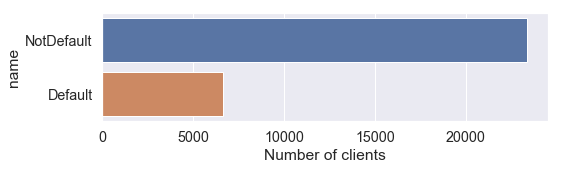

In [19]:
plt.figure(figsize=(8,2))
ax = sns.barplot(x = 'default payment next month'
            , y= 'name'
            , data=default)
ax.set_xlabel('default payment next month')
plt.xlabel('Number of clients')
plt.show()

In [20]:
ratio = default.iloc[1,1]/default['default payment next month'].sum()
ratio,default.iloc[1,1]

(0.2212, 6636)

A number of `6,636` out of 30,000 (or `22%`) of clients will `default` next month.<br>
And the dataset is `imbalance`.

## Split the data to training and test
> before doing any preprocessing, feature engineering, .... etc  on it, to make it (test data) represent real test data/ simulate a production data.<br>
we use `Stratified` technique to ensure we preserve the ratio of classes

In [21]:
df = df.sample(frac=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
X = df.drop(columns='default payment next month')
y = df['default payment next month']
train, test = next(kfold.split(X,y))
X_train, X_test = X.iloc[train,:], X.iloc[test,:]
y_train, y_test = y.iloc[train], y.iloc[test]
print('test: ',y_test.sum()/len(y_test))
print('train: ',y_train.sum()/len(y_train))

test:  0.22133333333333333
train:  0.22116666666666668


### Check train dataset

In [22]:
df_train = X_train
df_train['Default']=y_train
df_train

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
25306,25307,200000,female,graduate school,single,25,0,0,0,0,...,61450,-200,-200,6700,7000,3000,0,0,0,0
25145,25146,300000,male,high school,married,56,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
16635,16636,250000,male,graduate school,single,30,0,0,0,0,...,81376,61474,27864,40000,85756,35153,4236,6080,88,0
14558,14559,80000,female,university,married,27,0,0,0,0,...,5187,5524,5529,2000,2150,1000,2500,1000,1000,0
11007,11008,500000,male,graduate school,single,32,0,0,0,0,...,166464,168722,170299,8444,8009,5301,5220,5419,5313,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,9644,50000,male,graduate school,single,57,0,0,0,0,...,51199,20306,20306,1814,1816,2201,716,721,693,0
7639,7640,20000,male,high school,NaN,48,1,-2,-1,0,...,14457,20106,10258,0,42400,289,201,410,0,1
12071,12072,50000,female,university,married,26,0,0,0,0,...,660,1979,836,1411,1650,0,1979,0,1320,0
7613,7614,240000,male,university,single,37,0,0,0,0,...,169198,166131,169245,8000,7000,6000,5200,5400,5400,0


We can resume our work now 

## Fill missing values

In [23]:
def fill_null(features):
    """
    fill_null(df):
        fill null value EDUCATION with others, MARRIAGE with unknown
        , SEX with most frequent value, and all numeric columns with median value.
    Parameters:
        features: pandas dataframe
            features to handle missing values in it
    Return:
        cleaned_features: pandas dataframe
            features after handling missing values.
    """
    features.EDUCATION = features.EDUCATION.fillna('others')
    features.MARRIAGE = features.MARRIAGE.fillna('unknown')
    features.SEX = features.SEX.fillna(features.SEX.mode()[0])
    cleaned_features = features.fillna(features.quantile())
    return cleaned_features

In [24]:
df_train.EDUCATION.unique()

array(['graduate school', 'high school', 'university', nan, 'others', 0],
      dtype=object)

In [25]:
df_train.isna().sum()

ID             0
LIMIT_BAL      0
SEX            0
EDUCATION    267
MARRIAGE     263
AGE            0
PAY_0          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
Default        0
dtype: int64

In [26]:
df_clean = fill_null(df_train.copy())
df_clean.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Default      0
dtype: int64

In [27]:
pd.merge(df_train.EDUCATION.value_counts(),df_clean.EDUCATION.value_counts(), left_index=True, right_index=True,how='outer')

,EDUCATION_x,EDUCATION_y
university,11220,11220
graduate school,8461,8461
high school,3941,3941
others,99,366
0,12,12


In [28]:
pd.merge(df_train.MARRIAGE.value_counts(),df_clean.MARRIAGE.value_counts(), left_index=True, right_index=True,how='outer')

,MARRIAGE_x,MARRIAGE_y
0,48.0,48
married,10943.0,10943
single,12746.0,12746
unknown,NaN,263


As we see `others` value increase in education and `unknow` in marriage

### Validate values

In [29]:
def validate_values(features):
    """validate_values(features)
    convert invalide value to valide one
    Parameters: 
        features: pandas df
            features to validate
    Return:
        features: pandas df
            df after validation
    """
    # Valide value for EDUCATION
    edu_cate = ['university','graduate school','high school','others']
    # convert invalide value to others
    features['EDUCATION'] = features.EDUCATION.apply(lambda x: x if x in edu_cate else 'others')
    
    # Valide value for MARRIAGE
    mari_cate = ['single','married']
    # convert invalide value to unknown
    features['MARRIAGE'] = features.MARRIAGE.apply(lambda x: x if x in mari_cate else 'unknown')
    
    # Valide value for SEX
    sex_cate = ['male','female']
    # convert invalide value to unknown
    features['SEX'] = features.SEX.apply(lambda x: x if x in sex_cate else 'others')
    return features
    

In [30]:
df_clean = validate_values(df_clean)
df_clean.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
25306,25307,200000,female,graduate school,single,25,0,0,0,0,...,61450,-200,-200,6700,7000,3000,0,0,0,0
25145,25146,300000,male,high school,married,56,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
16635,16636,250000,male,graduate school,single,30,0,0,0,0,...,81376,61474,27864,40000,85756,35153,4236,6080,88,0
14558,14559,80000,female,university,married,27,0,0,0,0,...,5187,5524,5529,2000,2150,1000,2500,1000,1000,0
11007,11008,500000,male,graduate school,single,32,0,0,0,0,...,166464,168722,170299,8444,8009,5301,5220,5419,5313,0


In [31]:
pd.merge(df_train.EDUCATION.value_counts(),df_clean.EDUCATION.value_counts(), left_index=True, right_index=True,how='outer')

,EDUCATION_x,EDUCATION_y
0,12,NaN
graduate school,8461,8461.0
high school,3941,3941.0
others,99,378.0
university,11220,11220.0


In [32]:
pd.merge(df_train.MARRIAGE.value_counts(),df_clean.MARRIAGE.value_counts(), left_index=True, right_index=True,how='outer')

,MARRIAGE_x,MARRIAGE_y
0,48.0,NaN
married,10943.0,10943.0
single,12746.0,12746.0
unknown,NaN,311.0


Number of `others` value in education and `unknow` in marriage increase again, as we validate the values

## Categorical Encoding
one hot encoding

In [33]:
def age_bins(age):
    """
    age_bins(age):
        convert age to bins
        ['21 to 35', '36 to 55', '56 to 70', 'above 70']
        Parameters:
            age:pandas series
        return pandas_series
    """
    age = age.apply(lambda x: x if x<=70 else 100)
    return pd.cut(x=age
               , bins=[20, 35, 55, 70, 100]
               , labels=['21 to 35'
                         , '36 to 55'
                         , '56 to 70'
                         , 'above 70'])    

In [34]:
df_clean['age_bin'] = age_bins(df_clean['AGE'])
df_clean.drop(columns=['AGE']
              ,inplace=True)
df_clean.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,age_bin
25306,25307,200000,female,graduate school,single,0,0,0,0,0,...,-200,-200,6700,7000,3000,0,0,0,0,21 to 35
25145,25146,300000,male,high school,married,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,1,56 to 70
16635,16636,250000,male,graduate school,single,0,0,0,0,0,...,61474,27864,40000,85756,35153,4236,6080,88,0,21 to 35
14558,14559,80000,female,university,married,0,0,0,0,0,...,5524,5529,2000,2150,1000,2500,1000,1000,0,21 to 35
11007,11008,500000,male,graduate school,single,0,0,0,0,0,...,168722,170299,8444,8009,5301,5220,5419,5313,0,21 to 35


In [35]:
def cate_encode(df):
    return pd.get_dummies(df)

In [36]:
df_clean = cate_encode(df_clean)

In [37]:
df_clean = pd.merge(df_clean.drop(columns='Default')
                    ,df_clean.Default
                    ,left_index=True
                    ,right_index=True
                   )

In [38]:
df_clean.head()

,ID,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_single,MARRIAGE_unknown,age_bin_21 to 35,age_bin_36 to 55,age_bin_56 to 70,age_bin_above 70,Default
25306,25307,200000,0,0,0,0,0,-2,183516,179534,...,0,0,0,1,0,1,0,0,0,0
25145,25146,300000,-2,-2,-2,-2,-2,-2,0,0,...,0,0,1,0,0,0,0,1,0,1
16635,16636,250000,0,0,0,0,0,0,73936,106903,...,0,0,0,1,0,1,0,0,0,0
14558,14559,80000,0,0,0,0,0,0,25424,24499,...,0,1,1,0,0,1,0,0,0,0
11007,11008,500000,0,0,0,0,0,0,208603,211340,...,0,0,0,1,0,1,0,0,0,0


### Check Correlation between Features

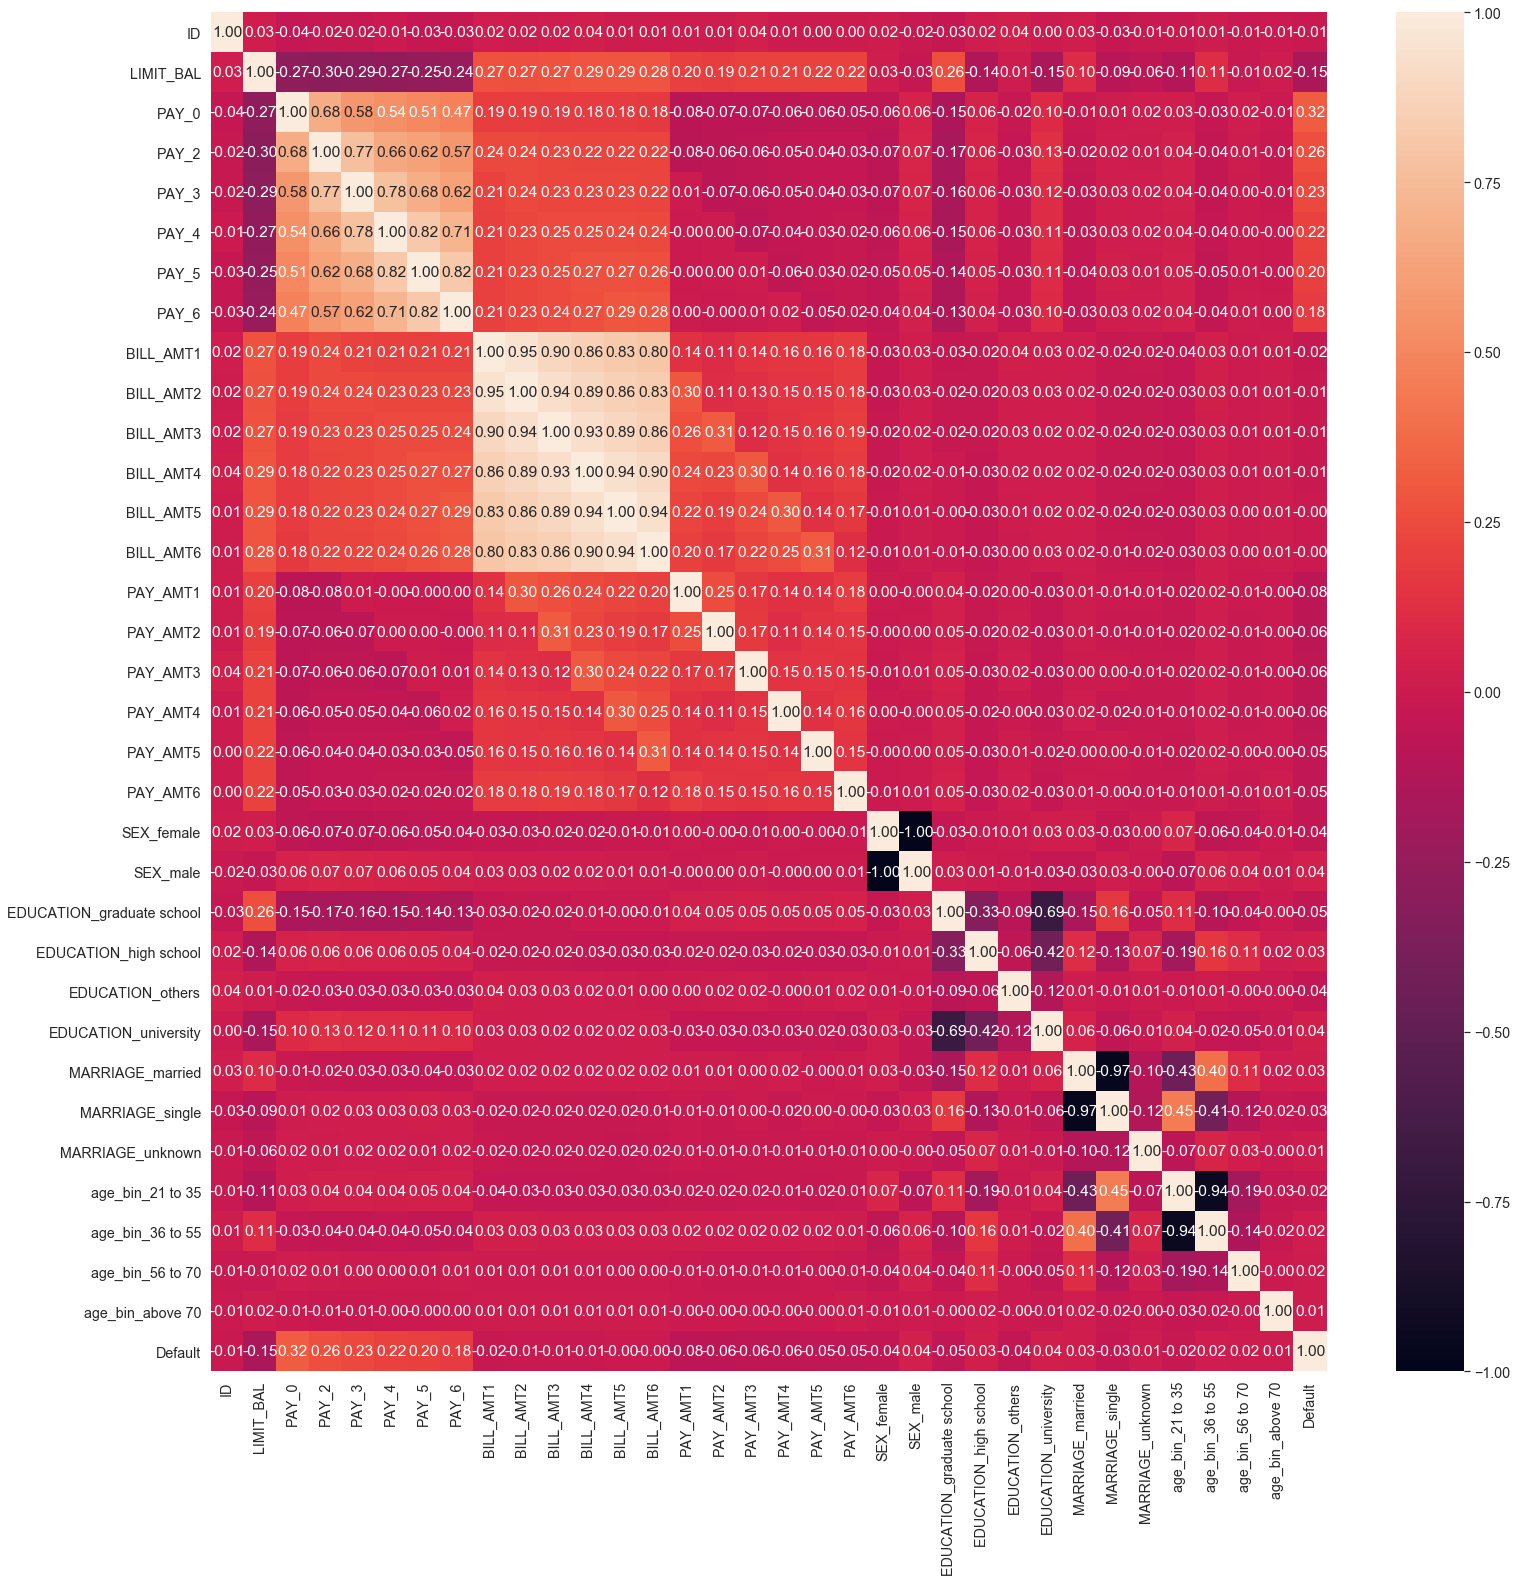

In [39]:
correlation_matrics = df_clean.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrics, annot=True,fmt=".2f")
plt.show()

### Remove Correlated Features
Because there are some correlations, let's remove the correlated data that has more than 0.89 correlation.

In [40]:
def remove_corr(df,thresh=0.85):
    """
    remove_corr(df,thresh=0.85):
        return columns with thresh correlation to drop
    Parameters:
        df: dataframe
            correlation_matrix
        thresh: float
            correlation threshold
    Return:
        removed_col: set()
            columns' name to be droped
    """
    removed_col=set()
    for col in df.columns:
        if col in removed_col:
            continue
        else:
            upper_thresh = (df[col]>=thresh)&(df[col]<1)
            lowwer_thresh = (df[col]<=-1*thresh)
            idx = np.where(upper_thresh | lowwer_thresh)
            temp = df.iloc[idx].index
            
            if len(temp):
                removed_col.update(list(temp))
    return removed_col

In [41]:
drop_col = remove_corr(correlation_matrics,0.89)
print(drop_col)

{'age_bin_36 to 55', 'BILL_AMT3', 'SEX_male', 'BILL_AMT6', 'BILL_AMT2', 'MARRIAGE_single', 'BILL_AMT5'}


In [42]:
df_clean.drop(columns=drop_col
              ,inplace=True)

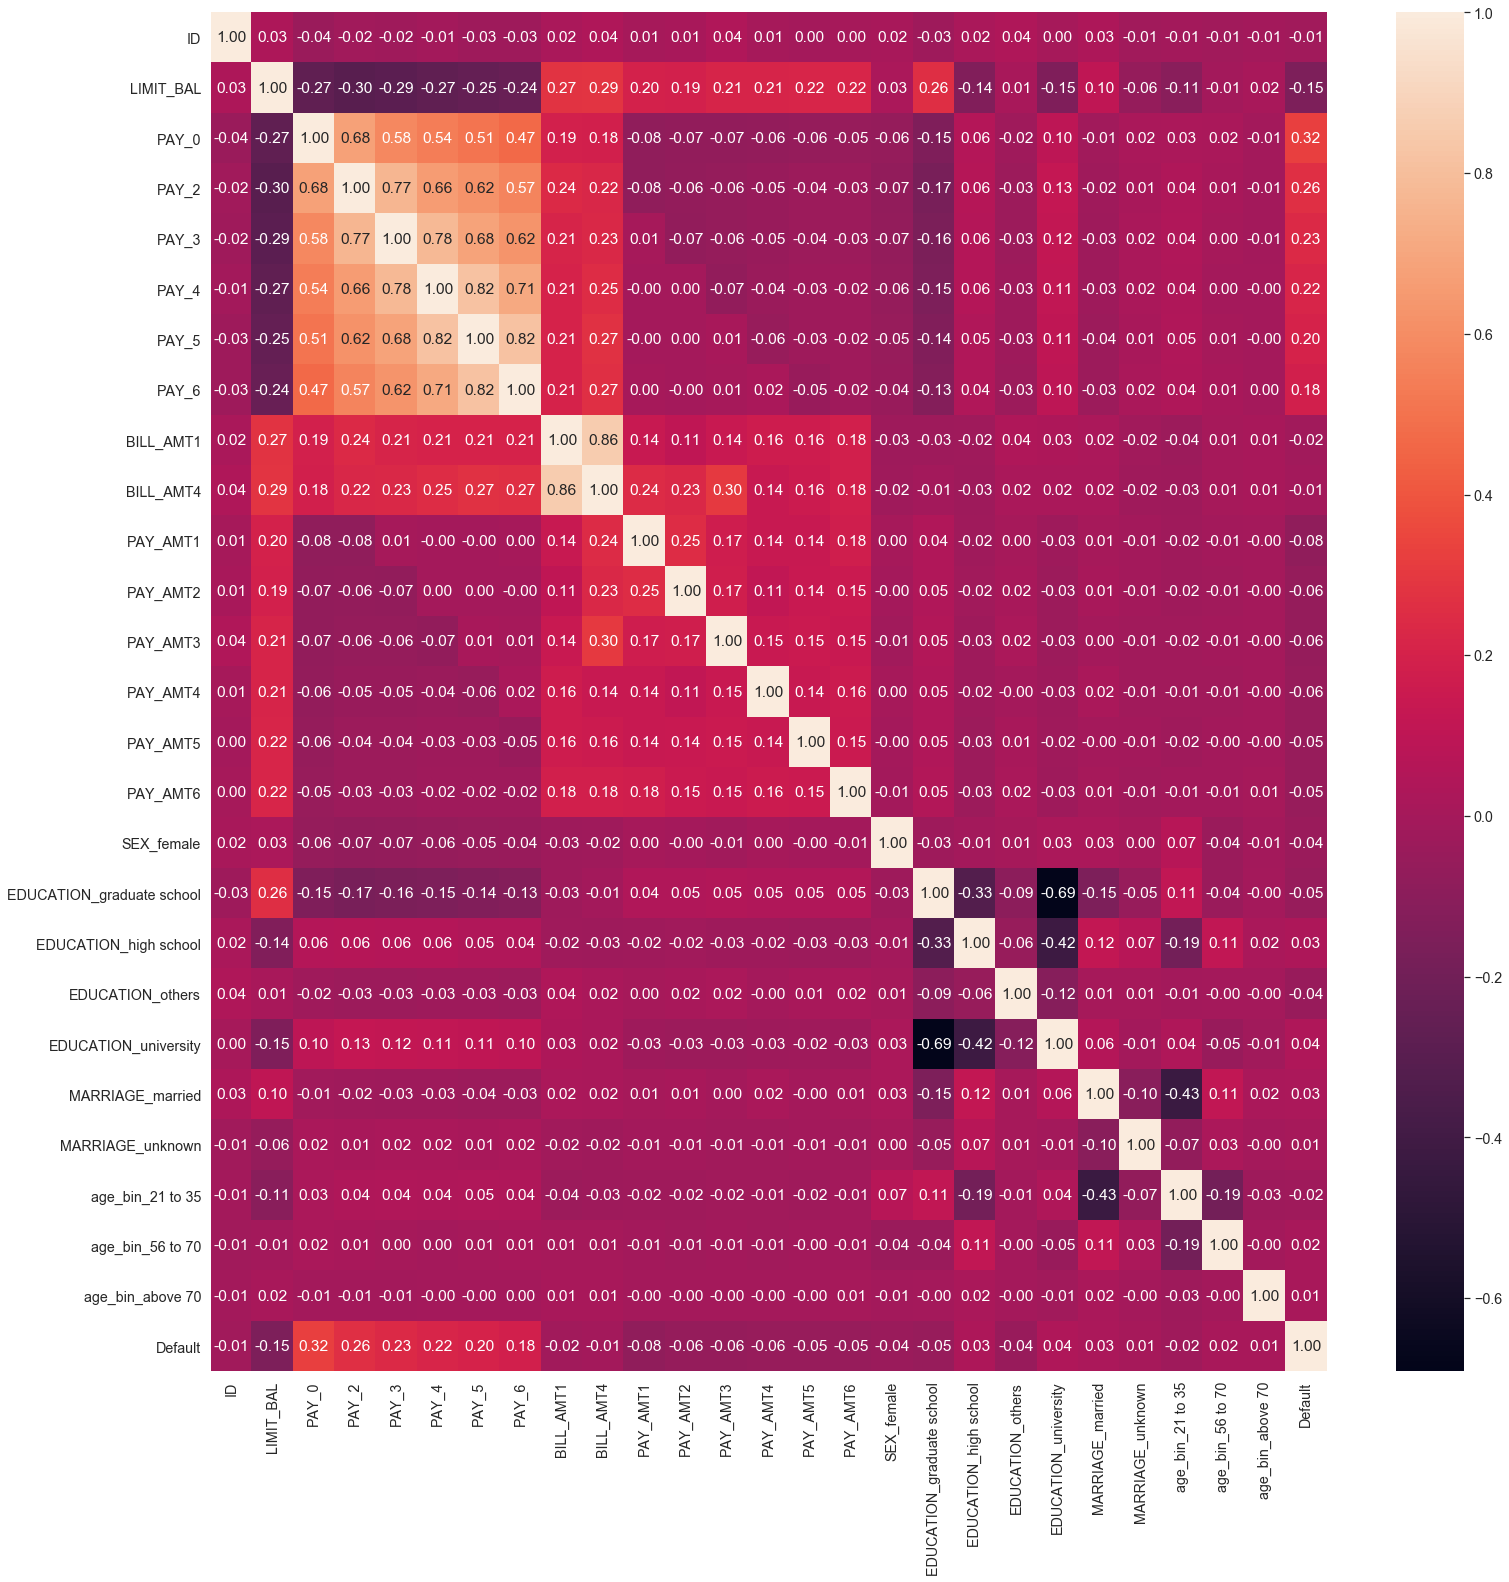

In [43]:
correlation_matrics = df_clean.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrics, annot=True,fmt=".2f")
plt.show()

### Check for Duplication

In [44]:
df_clean.duplicated().sum()

0

In [45]:
df_clean.shape

(24000, 27)

In [46]:
X=df_clean.drop(columns=['Default','ID'])
y=df_clean.Default

In [47]:
X.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT4,PAY_AMT1,...,SEX_female,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_unknown,age_bin_21 to 35,age_bin_56 to 70,age_bin_above 70
25306,200000,0,0,0,0,0,-2,183516,61450,6700,...,1,1,0,0,0,0,0,1,0,0
25145,300000,-2,-2,-2,-2,-2,-2,0,0,0,...,0,0,1,0,0,1,0,0,1,0
16635,250000,0,0,0,0,0,0,73936,81376,40000,...,0,1,0,0,0,0,0,1,0,0
14558,80000,0,0,0,0,0,0,25424,5187,2000,...,1,0,0,0,1,1,0,1,0,0
11007,500000,0,0,0,0,0,0,208603,166464,8444,...,0,1,0,0,0,0,0,1,0,0


## Functions for Model evaluate/select/build

### Model Evaluation

In [48]:
def eval_matrix(y_true, y_pred, title='training'):
    """
    eval_matrix(y_true, y_pred, title='training')
        evaluate a model using confusion matrix 
    Parameters:
        y_true: pandas sereis
            labels/true values
        y_pred: pandas sereis
            predicted values
        title: str
            type of evaluation traing/validation/test
    Return:
        None
    """
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy}')
    
    # Calculate precision
    precision = precision_score(y_true, y_pred)
    print(f'Precision: {precision}')
    
    # Calculate recall
    recall = recall_score(y_true, y_pred)
    print(f'Recall: {recall}')
    
    confusion_matrix = pd.crosstab(index=y_true
                                   , columns=np.round(y_pred)
                                   , rownames=['True']
                                   , colnames=['predictions']
                                  ).astype(int)
    plt.figure(figsize = (5,5))
    sns.heatmap(confusion_matrix
                , annot=True
                , fmt='.2f'
                , cmap="YlGnBu"
               ).set_title('Confusion Matrix: {}'.format(title)) 
    plt.show()
    

### Model Selection

In [49]:
# get a list of models to evaluate
def get_models():
    """
    get_models()
     get a list of models to evaluate
    Parameters:
        None
    Return:
        List
    """
    models = list()
    models.append(LogisticRegression())
    models.append(SGDClassifier())
    models.append(LinearSVC())
    models.append(SVC())
    models.append(RandomForestClassifier())
    models.append(GradientBoostingClassifier())
    return models

In [50]:
def kfold_model(model, X, y, k, metric='accuracy'):
    """
    kfold_model(model, X, y, k, metric='accuracy')
        evaluate a model using kfold cross validation
    Parameters:
        model:estimator()
            model to evaluate
        X: pandas dataframe
            features
        y: pandas sereis
            labels/target column
        k: int
            number of kfold
        metric: str
            scorring metric
    Return:
        scores: list
            model scores
    """
    kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)
    scores = []
    i=0
    for train, val in kfold.split(X,y):
        i+=1
        x_train, x_val = X.iloc[train,:], X.iloc[val,:]
        y_train, y_val = y.iloc[train], y.iloc[val]
        
        model.fit(x_train,y_train)
        print('*'*10,'{} fold'.format(i),'*'*10)
        pred_train =model.predict(x_train)
        eval_matrix(y_train, pred_train)
        
        pred_val = model.predict(x_val)
        eval_matrix(y_val, pred_val, 'Validation')
        
        if metric=='accuracy':
            scores.append(accuracy_score(y_val,pred_val))
        elif metric=='precision':
            scores.append(precision_score(y_val,pred_val))
        elif metric=='recall':
            scores.append(recall_score(y_val,pred_val))
    return scores

In [51]:
# define test conditions
def model_sel(X, y,model=False, metric='recall', k=5, draw=False):
    # get the list of models to consider
    models = []
    if model==False:
        models = get_models()
    else:
        models.append(model)
    
    # evaluate each model
    for model in models:
        print('>{m}: '.format(m=type(model).__name__))
        cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)
        if draw:
            scores = kfold_model(model
                                   ,X
                                   ,y
                                   ,k
                                   ,metric)
        else:
            scores = cross_val_score(model
                            ,X
                            ,y
                            ,cv=cv
                            ,scoring=metric
                            ,n_jobs=-1)
        # summarize progress
        print('>{m}: {a} {met}={s} '.format(m=type(model).__name__, met=metric, s=scores, a=np.mean(scores)))
        print('*'*50)

## How to work with imbalance dataset
As we know eariler the data is imbalance so we have three options to work through:<br>
    <ol>
    <li> Work as it is.</li>
    <li> Under sampling (decrease the `majority` class to be equal the `minority` one)</li>
    <li> Over sampling (increase the `minority` class to be equal the `majority` one)</li>
    </ol>
Because the dataset is small we cannot work with option 2, as we will lose alot of information.

### Work as it is

#### Model training

In [52]:
X_train,X_val,y_train,y_val=train_test_split(X
                                               ,y
                                               ,test_size=0.2
                                               , random_state=42
                                               , shuffle=True
                                              )

In [53]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

#### Model predict & evaluate

In [54]:
preds = model.predict(X_val)

Accuracy: 0.77625
Precision: 0.0
Recall: 0.0


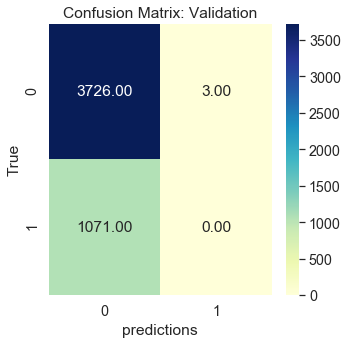

In [55]:
eval_matrix(y_val, preds, 'Validation')

Recall metric is zero, let's try another model.

### Model Selection

In [56]:
model_sel(X, y)

>LogisticRegression: 
>LogisticRegression: 0.0011301209994479854 recall=[0.00094251 0.         0.00094162 0.00188324 0.00188324] 
**************************************************
>SGDClassifier: 
>SGDClassifier: 0.14099799251319242 recall=[0.         0.69934025 0.00564972 0.         0.        ] 
**************************************************
>LinearSVC: 
>LinearSVC: 0.007722700575621548 recall=[0.         0.00754006 0.02919021 0.         0.00188324] 
**************************************************
>SVC: 
>SVC: 0.0 recall=[0. 0. 0. 0. 0.] 
**************************************************
>RandomForestClassifier: 
>RandomForestClassifier: 0.36567126560417196 recall=[0.34872762 0.36569274 0.39171375 0.35969868 0.36252354] 
**************************************************
>GradientBoostingClassifier: 
>GradientBoostingClassifier: 0.35926807492487456 recall=[0.34872762 0.36475024 0.38041431 0.35875706 0.34369115] 
**************************************************


#### We will work with GradientBoosting

## Features Engineering

Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.<br>
So we don't use any scaler here, to verify that we just try standerscaling.

#### Try  standerscaling

In [57]:
scaler = StandardScaler()
X_train_scaler = pd.DataFrame(scaler.fit_transform(X))

In [58]:
model = GradientBoostingClassifier()
model_sel(X=X_train_scaler, y=y, model=model)

>GradientBoostingClassifier: 
>GradientBoostingClassifier: 0.35926807492487456 recall=[0.34872762 0.36475024 0.38041431 0.35875706 0.34369115] 
**************************************************


As we mentioned earlier there is no improvement after applaying scalling

#### Try add more features

In [59]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_p = pd.DataFrame(poly.fit_transform(X))

In [60]:
model = GradientBoostingClassifier()
model_sel(X=X_p, y=y, model=model)

>GradientBoostingClassifier: 
>GradientBoostingClassifier: 0.35907939601449085 recall=[0.34967012 0.36192271 0.38041431 0.35499058 0.34839925] 
**************************************************


No improvement again

## HyberParameter tuning

In [61]:
param_grid = {'n_estimators': [120,200,250,300]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid_clf = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = cv, scoring= 'f1')
grid_clf.fit(X=X, y=y)
best = grid_clf.best_estimator_
print(grid_clf.best_estimator_)
print(np.abs(grid_clf.best_score_))

GradientBoostingClassifier(n_estimators=300)
0.4706985154297705


### Model Evaluation

>GradientBoostingClassifier: 
********** 1 fold **********
Accuracy: 0.8345703125
Precision: 0.7286947141316074
Recall: 0.3986426674535261


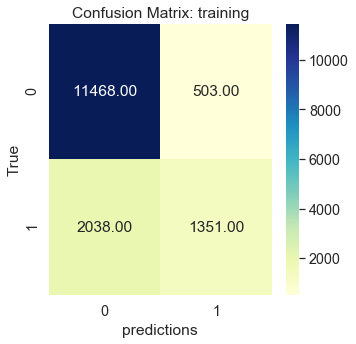

Accuracy: 0.82265625
Precision: 0.6843267108167771
Recall: 0.36556603773584906


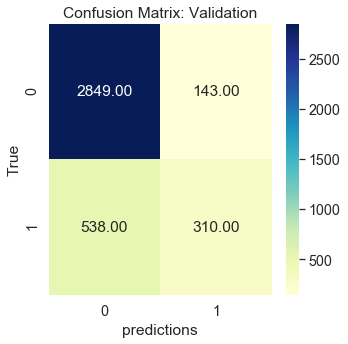

********** 2 fold **********
Accuracy: 0.8342447916666667
Precision: 0.7240829346092504
Recall: 0.401888462673355


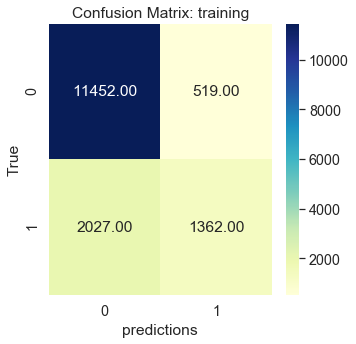

Accuracy: 0.8247395833333333
Precision: 0.690631808278867
Recall: 0.3738207547169811


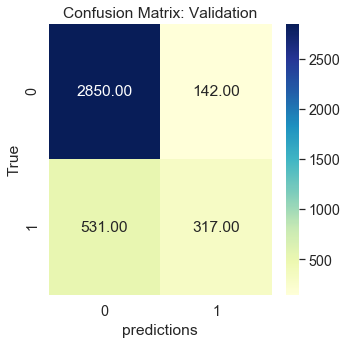

********** 3 fold **********
Accuracy: 0.8344401041666667
Precision: 0.7283018867924528
Recall: 0.3985250737463127


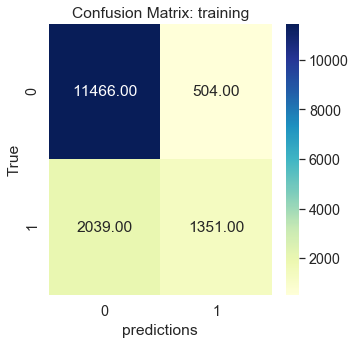

Accuracy: 0.8197916666666667
Precision: 0.6726057906458798
Recall: 0.3565525383707202


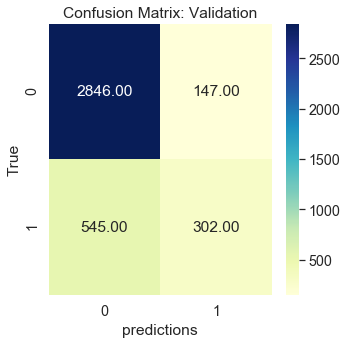

********** 4 fold **********
Accuracy: 0.8341145833333333
Precision: 0.7288043478260869
Recall: 0.39557522123893807


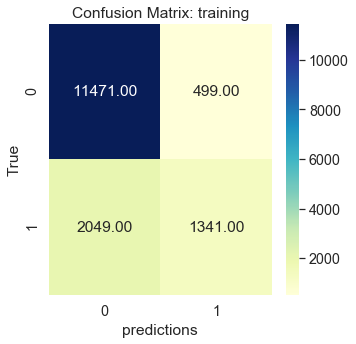

Accuracy: 0.8145833333333333
Precision: 0.6496674057649667
Recall: 0.345926800472255


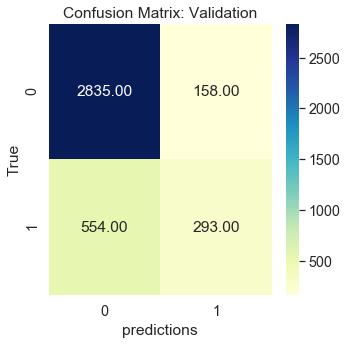

********** 5 fold **********
Accuracy: 0.8342447916666667
Precision: 0.7290988056460369
Recall: 0.396165191740413


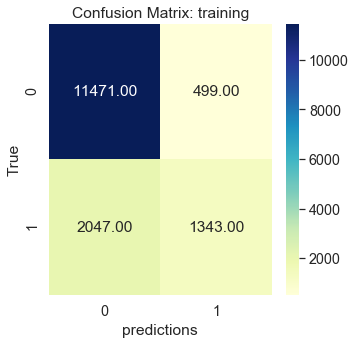

Accuracy: 0.8182291666666667
Precision: 0.6505050505050505
Recall: 0.38016528925619836


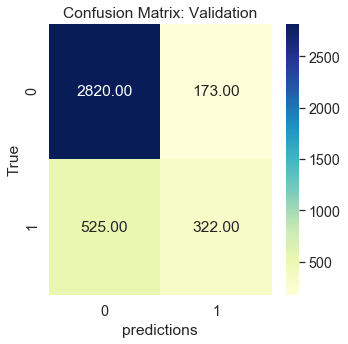

>GradientBoostingClassifier: 0.36440628411040077 recall=[0.36556603773584906, 0.3738207547169811, 0.3565525383707202, 0.345926800472255, 0.38016528925619836] 
**************************************************


In [62]:
model_sel(X=X_train, y=y_train, model= GradientBoostingClassifier(n_estimators=250), draw=True)

## OverSampling

In [63]:
!pip install imblearn
from imblearn.over_sampling import SMOTE 

# Drop the columns from your original dataset that you don't need
X = df_clean.drop(columns=['Default','ID'])

# Use the class feature as the labels
y = df_clean['Default']

sm = SMOTE(random_state=35)
X_res, y_res = sm.fit_resample(X, y)

In [64]:
smote_df = pd.DataFrame(X_res,columns=X.columns)
smote_df['Default'] = y_res
smote_df.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT4,PAY_AMT1,...,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_unknown,age_bin_21 to 35,age_bin_56 to 70,age_bin_above 70,Default
0,200000,0,0,0,0,0,-2,183516,61450,6700,...,1,0,0,0,0,0,1,0,0,0
1,300000,-2,-2,-2,-2,-2,-2,0,0,0,...,0,1,0,0,1,0,0,1,0,1
2,250000,0,0,0,0,0,0,73936,81376,40000,...,1,0,0,0,0,0,1,0,0,0
3,80000,0,0,0,0,0,0,25424,5187,2000,...,0,0,0,1,1,0,1,0,0,0
4,500000,0,0,0,0,0,0,208603,166464,8444,...,1,0,0,0,0,0,1,0,0,0


In [65]:
smote_df.shape

(37384, 26)

In [66]:
smote_df.duplicated().sum()

592

In [67]:
smote_df.drop_duplicates(inplace=True)

In [68]:
smote_df.duplicated().sum()

0

##### Check for correlation between features after oversampling

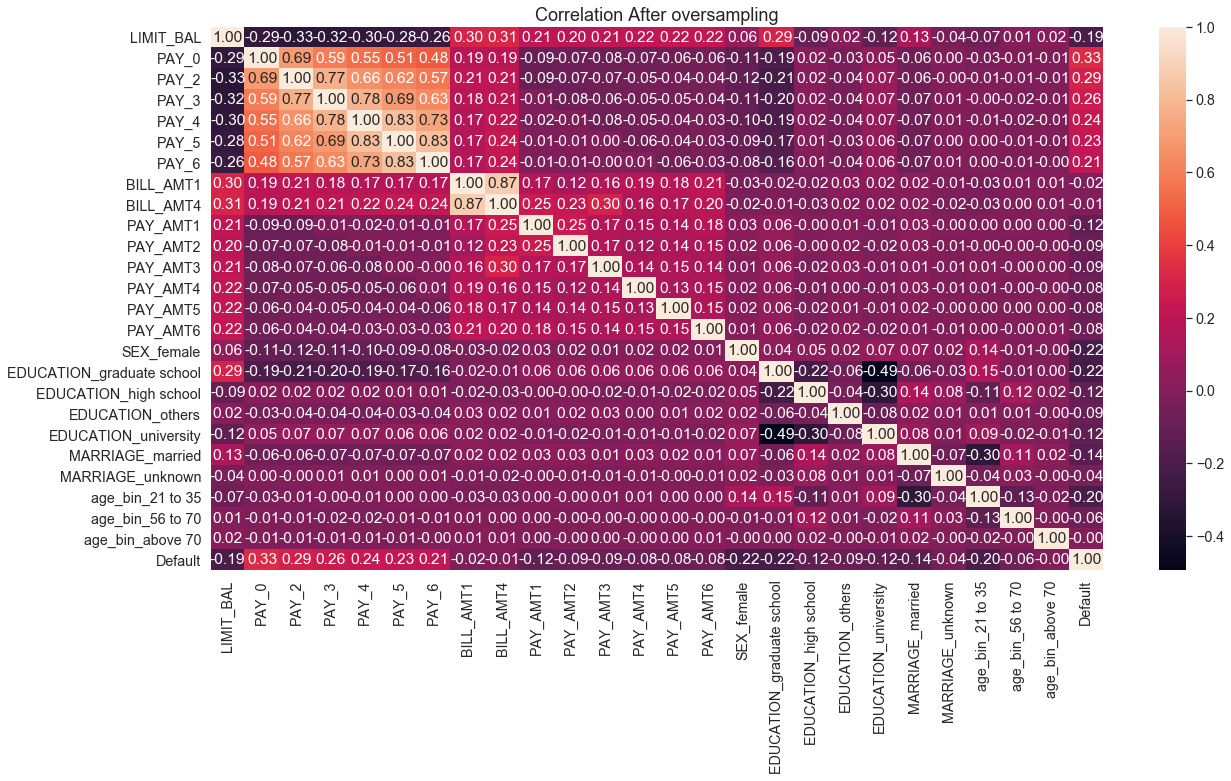

In [69]:
plt.figure(figsize = (20,10))

correlation_matrix_over = smote_df.corr()
sns.heatmap(correlation_matrix_over, annot=True,fmt=".2f");

plt.title('Correlation After oversampling',fontdict={'size':'18'})
plt.show()

In [70]:
drop_col = remove_corr(correlation_matrix_over,0.89)
print(drop_col)

set()


In [71]:
smote_df.drop(columns=drop_col,inplace=True)

### Model Selection (OverSampling)

In [72]:
model_sel(X=smote_df.drop(columns='Default'), y=smote_df.Default)

>LogisticRegression: 
>LogisticRegression: 0.3461432884984903 recall=[0.34477079 0.35410376 0.3442218  0.33955531 0.34806478] 
**************************************************
>SGDClassifier: 
>SGDClassifier: 0.6053252813615152 recall=[0.40433708 0.23744167 0.42272852 0.99478452 0.96733461] 
**************************************************
>LinearSVC: 
>LinearSVC: 0.8190502333241835 recall=[0.97776558 0.98956904 0.14493549 1.         0.98298106] 
**************************************************
>SVC: 
>SVC: 0.6701070546253088 recall=[0.67718913 0.67005215 0.67554214 0.67224815 0.65550371] 
**************************************************
>RandomForestClassifier: 
>RandomForestClassifier: 0.8191600329398847 recall=[0.81608564 0.81636014 0.8289871  0.82047763 0.81388965] 
**************************************************
>GradientBoostingClassifier: 
>GradientBoostingClassifier: 0.7467471863848476 recall=[0.73702992 0.74855888 0.75267637 0.74608839 0.74938238] 
*****************

#### Evaluate RandomForest

>RandomForestClassifier: 
********** 1 fold **********
Accuracy: 0.998199300105324
Precision: 0.997873945545573
Recall: 0.9984902552841065


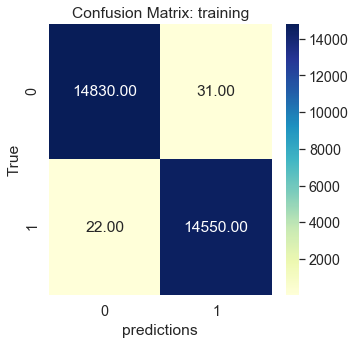

Accuracy: 0.8563663541242017
Precision: 0.8850506253722454
Recall: 0.8158111446609937


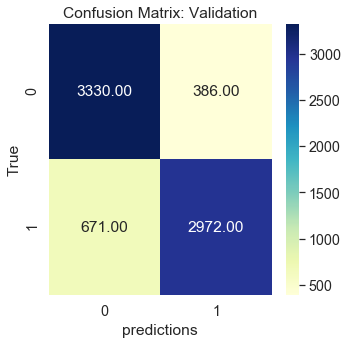

********** 2 fold **********
Accuracy: 0.9985050793327218
Precision: 0.9982850871175745
Recall: 0.9986961295635465


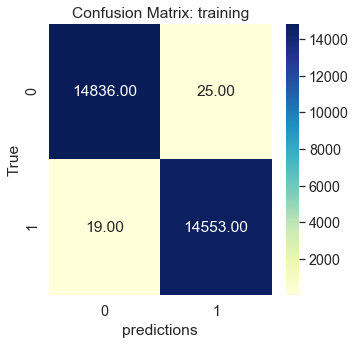

Accuracy: 0.8518820491914663
Precision: 0.8764376290179888
Recall: 0.8158111446609937


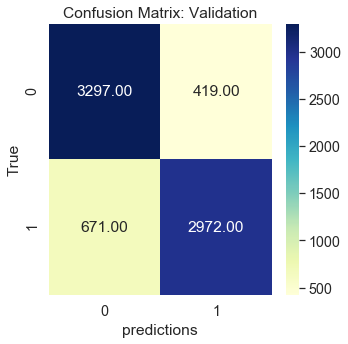

********** 3 fold **********
Accuracy: 0.9983012842291228
Precision: 0.9982160010978455
Recall: 0.9983530057644798


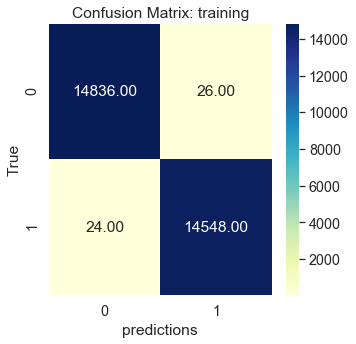

Accuracy: 0.8608317477575428
Precision: 0.8836800468795781
Recall: 0.8278891023881416


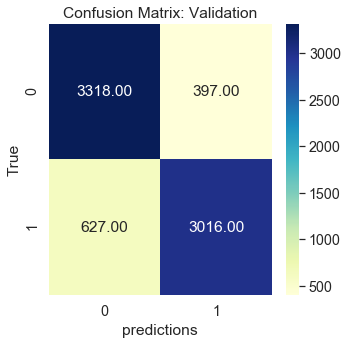

********** 4 fold **********
Accuracy: 0.9983692328599578
Precision: 0.9984214138641043
Recall: 0.9982843810046664


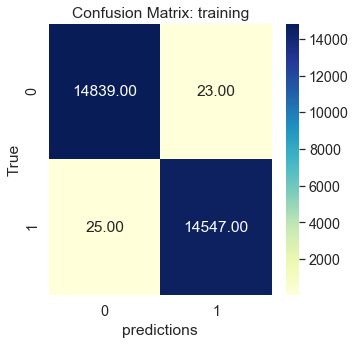

Accuracy: 0.8548518619189998
Precision: 0.8794577070439139
Recall: 0.819105133132034


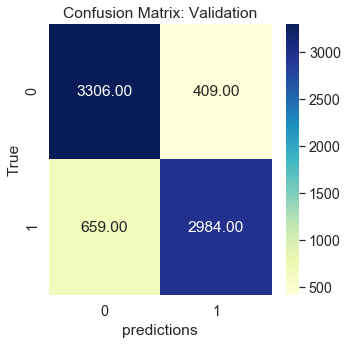

********** 5 fold **********
Accuracy: 0.9980634640211999
Precision: 0.9979416809605489
Recall: 0.9981471314850398


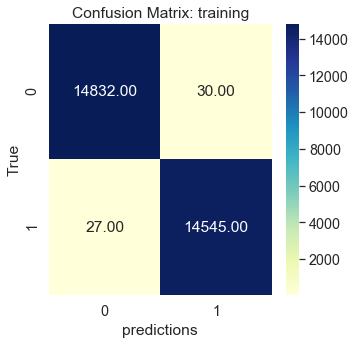

Accuracy: 0.8495515085621093
Precision: 0.8747044917257684
Recall: 0.8125171561899533


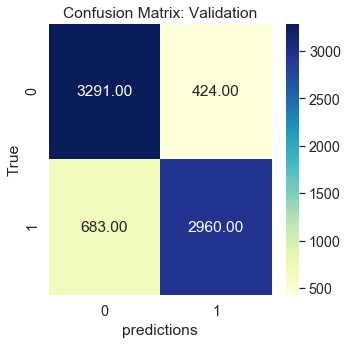

>RandomForestClassifier: 0.8182267362064233 recall=[0.8158111446609937, 0.8158111446609937, 0.8278891023881416, 0.819105133132034, 0.8125171561899533] 
**************************************************


In [73]:
model_sel(X=smote_df.drop(columns='Default')
          , y=smote_df.Default
          , model=RandomForestClassifier()
          , draw=True)

Model overfiting

#### Check GradientBoostingClassifier

>GradientBoostingClassifier: 
********** 1 fold **********
Accuracy: 0.8221723915333129
Precision: 0.8721504862107444
Recall: 0.7508921218775735


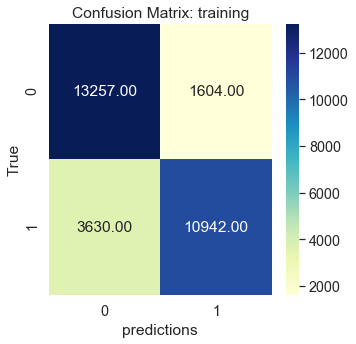

Accuracy: 0.8195406984644653
Precision: 0.8788870703764321
Recall: 0.7370299203952786


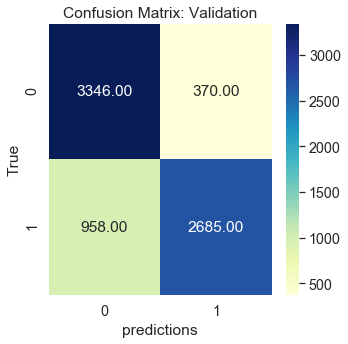

********** 2 fold **********
Accuracy: 0.8214589066693847
Precision: 0.8670711527854384
Recall: 0.7551468569860006


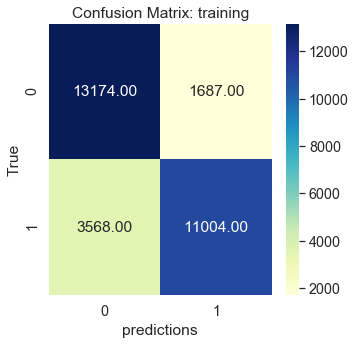

Accuracy: 0.8161434977578476
Precision: 0.8618836915297092
Recall: 0.7485588800439198


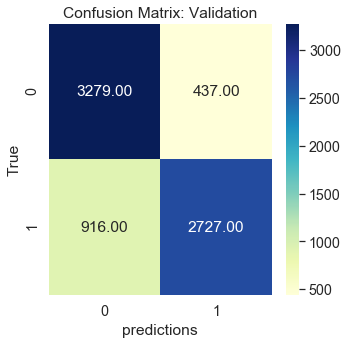

********** 3 fold **********
Accuracy: 0.821125229326629
Precision: 0.8698831571417216
Recall: 0.7510293713972002


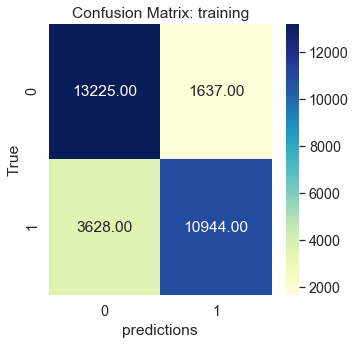

Accuracy: 0.8227779287849959
Precision: 0.8718600953895072
Recall: 0.7526763656327203


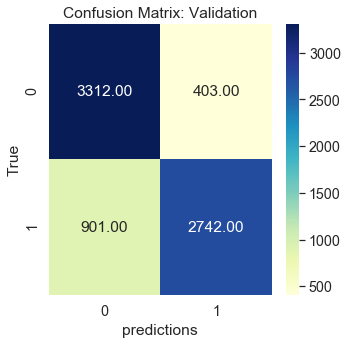

********** 4 fold **********
Accuracy: 0.822178433104573
Precision: 0.8723879406603924
Recall: 0.7506176228383201


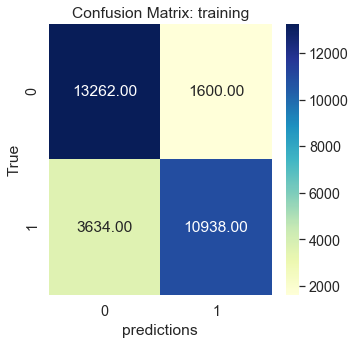

Accuracy: 0.817885294917097
Precision: 0.8675390999042452
Recall: 0.7460883886906395


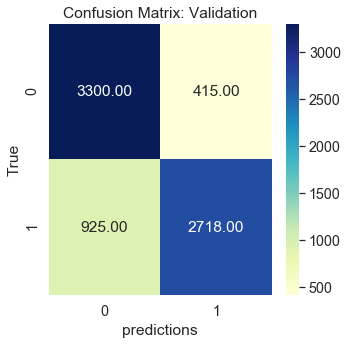

********** 5 fold **********
Accuracy: 0.822620099205001
Precision: 0.8738306548332934
Recall: 0.75


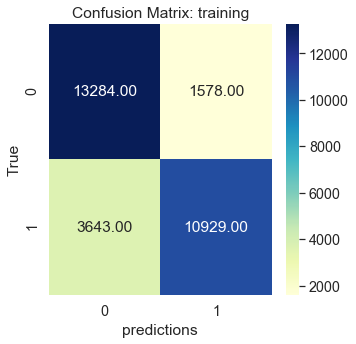

Accuracy: 0.8123131285675456
Precision: 0.8536585365853658
Recall: 0.7493823771616799


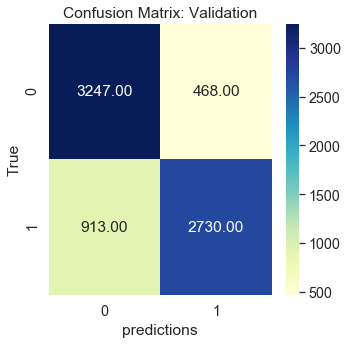

>GradientBoostingClassifier: 0.7467471863848476 recall=[0.7370299203952786, 0.7485588800439198, 0.7526763656327203, 0.7460883886906395, 0.7493823771616799] 
**************************************************


In [74]:
model_sel(X=smote_df.drop(columns='Default')
          , y=smote_df.Default
          , model=GradientBoostingClassifier()
          , draw=True)

#### hyperparameters tuning 

In [75]:
param_grid = {'n_estimators': [60,100]
              ,'max_depth': [2,3,5]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid_clf = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = cv, scoring= 'recall')
grid_clf.fit(X=smote_df.drop(columns='Default')
          , y=smote_df.Default)
best = grid_clf.best_estimator_
print(grid_clf.best_estimator_)
print(np.abs(grid_clf.best_score_))

GradientBoostingClassifier(max_depth=5)
0.7710678012626955


>GradientBoostingClassifier: 
********** 1 fold **********
Accuracy: 0.8517650256514796
Precision: 0.899319408589533
Recall: 0.7889102388141641


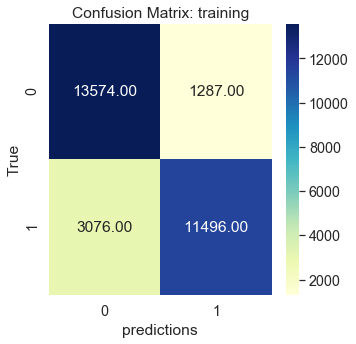

Accuracy: 0.8344883815735834
Precision: 0.8860235593759949
Recall: 0.7639308262421082


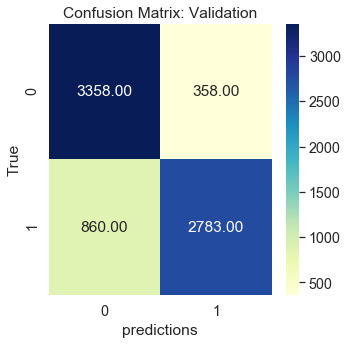

********** 2 fold **********
Accuracy: 0.8504399823327558
Precision: 0.8972035619434463
Recall: 0.7882239912160307


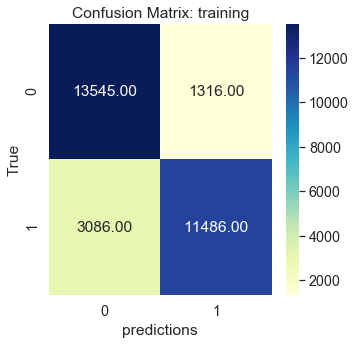

Accuracy: 0.830004076640848
Precision: 0.8735165521549032
Recall: 0.7677738127916552


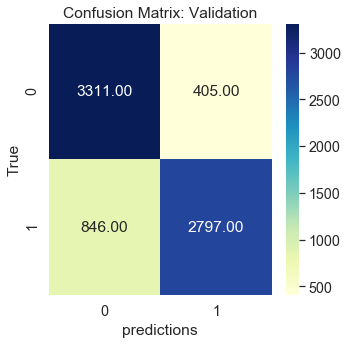

********** 3 fold **********
Accuracy: 0.8502072433240471
Precision: 0.8987679510319391
Recall: 0.7859593741421905


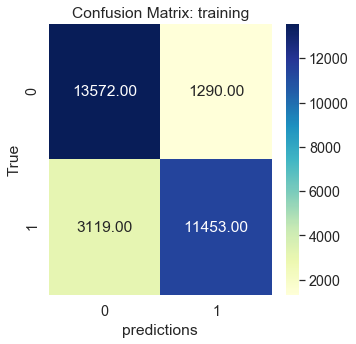

Accuracy: 0.839902147322642
Precision: 0.8824076946943841
Recall: 0.7806752676365633


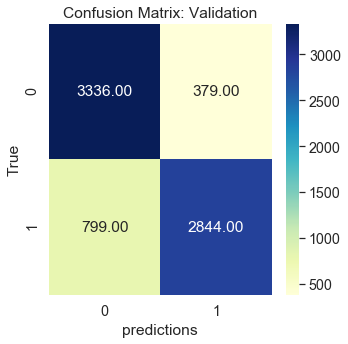

********** 4 fold **********
Accuracy: 0.8521777536182646
Precision: 0.9016110019646365
Recall: 0.7873318693384573


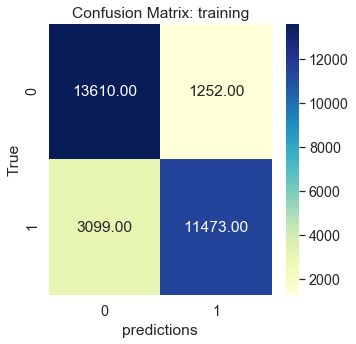

Accuracy: 0.8359608589290568
Precision: 0.8803872579637726
Recall: 0.7738127916552292


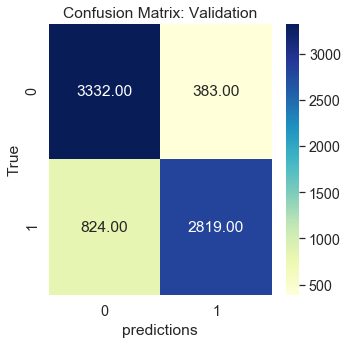

********** 5 fold **********
Accuracy: 0.8536726234966365
Precision: 0.9023281335737242
Recall: 0.7899396102113643


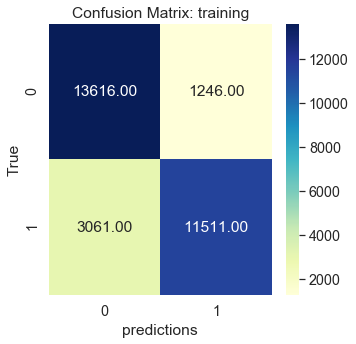

Accuracy: 0.8286219081272085
Precision: 0.8689591078066915
Recall: 0.7699698051056821


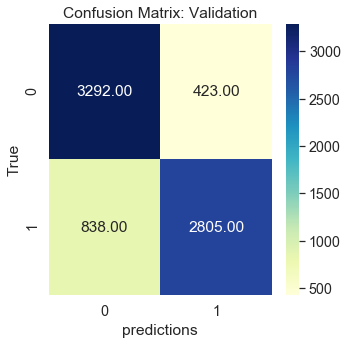

>GradientBoostingClassifier: 0.7712325006862477 recall=[0.7639308262421082, 0.7677738127916552, 0.7806752676365633, 0.7738127916552292, 0.7699698051056821] 
**************************************************


In [76]:
model_sel(X=smote_df.drop(columns='Default')
          , y=smote_df.Default
          , model=GradientBoostingClassifier(max_depth=5)
          , draw=True)

## Test a model

In [77]:
def preprocessing(df):
    
    # Validate values
    df = validate_values(df)
    
    # fill null values
    df = fill_null(df)
    
    # convert age to bins
    df['age_bin'] = age_bins(df['AGE'])
    df.drop(columns='AGE'
                ,inplace=True)
    
    # categorical encoding "one hot encoding"
    df = cate_encode(df)
    
    # Remove strong correlations
    drop_col = ['BILL_AMT6', 'age_bin_36 to 55', 'BILL_AMT2','BILL_AMT3', 'MARRIAGE_single', 'SEX_male', 'BILL_AMT4'
                ,'ID' #useless column
               ]
    df.drop(columns=drop_col
              ,inplace=True)

    return df


In [78]:
X_test = preprocessing(X_test)
X_test.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT5,PAY_AMT1,...,SEX_female,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_unknown,age_bin_21 to 35,age_bin_56 to 70,age_bin_above 70
29170,60000,1,2,0,0,0,2,8735,12041,0,...,1,0,0,0,1,0,0,0,0,0
7181,240000,0,-1,2,-1,0,0,18825,10036,12880,...,0,1,0,0,0,0,0,1,0,0
5209,50000,-1,-1,-1,-1,-1,-1,560,197,1121,...,1,0,0,0,1,1,0,0,0,0
27919,80000,-1,3,2,2,2,0,2127,2946,0,...,1,1,0,0,0,0,0,1,0,0
19916,30000,-2,-2,-2,-2,-2,-2,3340,0,0,...,1,1,0,0,0,1,0,0,0,0


In [79]:
X_test.shape

(6000, 25)

In [80]:
model = GradientBoostingClassifier(max_depth=5)
model.fit(X=smote_df.drop(columns='Default')
          , y=smote_df.Default)

GradientBoostingClassifier(max_depth=5)

In [81]:
X_test.columns

Index(['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT5', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_female',
       'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_others', 'EDUCATION_university', 'MARRIAGE_married',
       'MARRIAGE_unknown', 'age_bin_21 to 35', 'age_bin_56 to 70',
       'age_bin_above 70'],
      dtype='object')

In [82]:
smote_df.drop(columns='Default').columns

Index(['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT4', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_female',
       'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_others', 'EDUCATION_university', 'MARRIAGE_married',
       'MARRIAGE_unknown', 'age_bin_21 to 35', 'age_bin_56 to 70',
       'age_bin_above 70'],
      dtype='object')

Accuracy: 0.8071666666666667
Precision: 0.5807365439093485
Recall: 0.4631024096385542


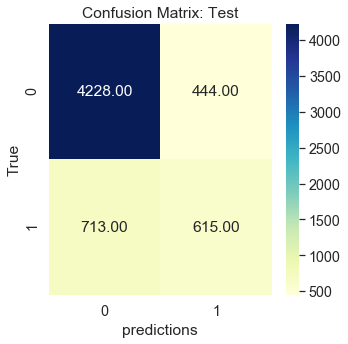

In [83]:
test_preds = model.predict(X_test)
eval_matrix(y_test, test_preds,'Test')

## References
[1] Default Credit Card Clients Dataset,<br>
https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/<br>
[2] Description of Dataset,<br> https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/discussion/181358<br>
[3] preprocessing<br>
https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9<br>
[4] Visualization with seaborn<br> https://www.python-graph-gallery.com/seaborn/<br>
[5] KFold cross validation<br>
https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/<br>
[6] Metrics and scoring<br>
https://scikit-learn.org/stable/modules/model_evaluation.html<br>
[7] RandomForrestClassifier,<br> http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br>
[8]LinearSVC,<br>
https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html<br>
[9]GradientBoostClassifier<br>
https://www.kaggle.com/prashant111/bagging-vs-boosting<br>


